# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP July-22

### _Author - Zecil Jain_

### Task -7 Develop A Neural Network That Can Read Handwriting

This project is aimed at creating an ML model that can read handwritten text from images. We will be using Tensorflow and Convolutional Neural Network to develop the model. The dataset to be used is from MNIST under its Handwritten Digit Classification Challenge. 

The dataset's link can be found below.

Dataset Link: https://en.wikipedia.org/wiki/MNIST_database

## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import load_model

## Loading Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

## Exploring Dataset

We need to get a basic knowledge of the dataset and so we will perform operations on the dataset to get some general information about it.

In [3]:
print('X_train shape: ' + str(X_train.shape))
print('Y_train shape: ' + str(y_train.shape))
print('X_test shape:  '  + str(X_test.shape))
print('Y_test shape:  '  + str(y_test.shape))

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


## Exploratory Data Analysis

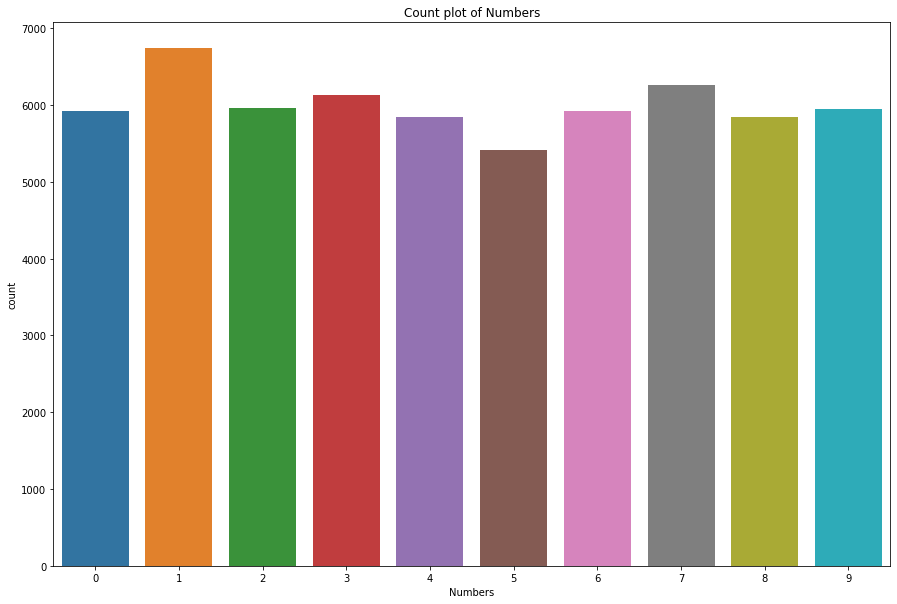

In [4]:
plt.figure(figsize=(15,10))
sns.countplot(y_train)
plt.xlabel('Numbers')
plt.title('Count plot of Numbers');

Above countplot shows use the frequency of each number in the dataset. We can clearly see that number '1' has the highest frequency amoungst all numbers with number '5' having the lowest frequency.

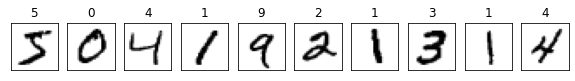

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=False, figsize=(10, 10))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Above plot shows the images of numbers present in the dataset. 

## Preprocessing Dataset

Just for the knowledge tensors are used to store data, they can be assumed as multidimensional arrays. For example a tensor representing a 64 X 64 image having 3 channels will have its dimensions (64, 64, 3).

Here we will reshape the training and testing matrices and add another column in both of them so that the dataset suitable for feeding into a CNN model.

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as training neural networks with this range gets efficient). This process is called normalization

In [8]:
X_train = X_train/255.0
X_test = X_test/255.0
classes = 10

## Model Building

The CNN model will be defined as per our dataset. The layers to be added in the model are:
- __Convolutional Layer__: This layer is the first layer that is used to extract the various features from the input images. We will be using __'_Conv2D_'__ for our convolutional layer requirements


- __Fully Connected Layer__: The Fully Connected (FC) layer consists of the weights and biases along with the neurons and is used to connect the neurons between two different layers. __'_Dense_'__ will be utilized for creating a FC layer here.


- __Dropout__: Usually, when all the features are connected to the FC layer, it can cause overfitting in the training dataset. Overfitting occurs when a particular model works so well on the training data causing a negative impact in the model’s performance when used on a new data. 
    To overcome this problem, a ___dropout layer___ is utilised wherein a few neurons are dropped from the neural network during training process resulting in reduced size of the model. 
    

- __Activation Functions__: Finally, one of the most important parameters of the CNN model is the activation function. They are used to learn and approximate any kind of continuous and complex relationship between variables of the network. In simple words, it decides which information of the model should fire in the forward direction and which ones should not at the end of the network.
    __'_Softmax activation_'__ function will be used which will convert all predictions into probability. Tuning can be performed on the architecture further to get the most optimal performance.

### Model Architecture

In [9]:
model = Sequential()
# Convolutional Layers
# 1st Layer
model.add(Conv2D(128, kernel_size=(3,3),
                activation=tf.nn.relu,
                input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#2nd Layer
model.add(Conv2D(64,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#3rd Layer
model.add(Conv2D(32,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

As you can see above in the model summary, we have used a ___CNN with 3 layers___, rectified linear unit function(___relu___) for controlling the exponential growth in computation, a (3,3) ___kernel size___ and 0.3 value for our ___Dropout rate___ which is standard value.

## Model Training

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=X_train,
                    y=y_train,
                    validation_split=0.1,
                    epochs=10)

Epoch 1/10
1688/1688 [==============================] - 523s 309ms/step - loss: 0.2630 - accuracy: 0.9223 - val_loss: 0.0571 - val_accuracy: 0.9850
Epoch 2/10
1688/1688 [==============================] - 533s 316ms/step - loss: 0.1143 - accuracy: 0.9667 - val_loss: 0.0752 - val_accuracy: 0.9847
Epoch 3/10
1688/1688 [==============================] - 511s 302ms/step - loss: 0.0912 - accuracy: 0.9732 - val_loss: 0.0750 - val_accuracy: 0.9862
Epoch 4/10
1688/1688 [==============================] - 453s 268ms/step - loss: 0.0752 - accuracy: 0.9785 - val_loss: 0.1066 - val_accuracy: 0.9843
Epoch 5/10
1688/1688 [==============================] - 552s 327ms/step - loss: 0.0662 - accuracy: 0.9816 - val_loss: 0.1020 - val_accuracy: 0.9835
Epoch 6/10
1688/1688 [==============================] - 450s 266ms/step - loss: 0.0565 - accuracy: 0.9834 - val_loss: 0.0857 - val_accuracy: 0.9870
Epoch 7/10
1688/1688 [==============================] - 475s 282ms/step - loss: 0.0545 - accuracy: 0.9840 - val_

We have trained our model and on the 10th epoch we can see that the final accuracy we achieved was 98.66% on the training data. Now lets see what accuracy we can achieve on the test data which is completely unseen by the model.

## Model Evaluation

In [17]:
model_eval = model.evaluate(X_test, y_test)
print("Evaluation Loss: ", model_eval[0])
print("Evaluation Accuracy: " + str(round(model_eval[1]*100,2)) + "%")

313/313 [==============================] - 16s 50ms/step - loss: 0.0667 - accuracy: 0.9884
Evaluation Loss:  0.0667138323187828
Evaluation Accuracy: 98.84%


Above results obtained show that we got an overall accuracy of 98.84% on our test data. This shows that our model has been trained very reliably and can be used to make predictions based on unseen data.

## Evaluation Plots

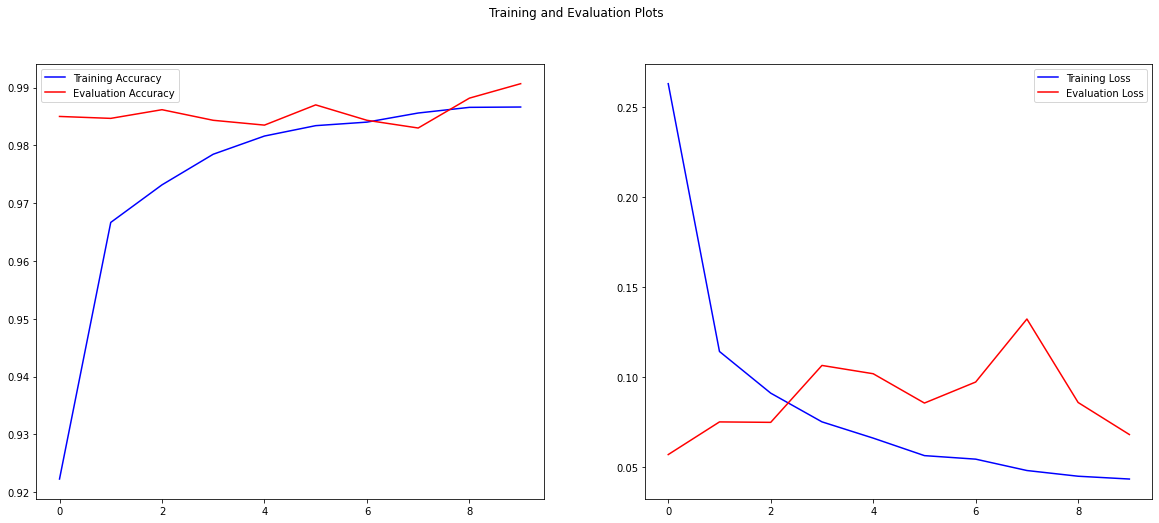

In [27]:
acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(epochs, acc, 'b', label='Training Accuracy')
ax[0].plot(epochs, v_acc, 'r', label='Evaluation Accuracy')
ax[0].legend(loc='best')
ax[1].plot(epochs, loss, 'b', label='Training Loss')
ax[1].plot(epochs, v_loss, 'r', label='Evaluation Loss')
ax[1].legend(loc='best')

plt.suptitle('Training and Evaluation Plots')
plt.show()

The above plots show the variation in training and evaluation accuracy scores and loss values over the period of training and evaluation process. We can see 2 significant trends in the plots:

1. The Training accuracy gradually rose to the peak whereas Evaluation accuracy had a small variation along the line but always maintained a good overall accuracy.

2. The data loss we faced during training was much higher in the beginning of the process but as we went forward it became much lower than even the loss we faced during evaluation. This shows that the model may be performing better during evaluation but we still need to tune the model to have as low loss of data as possible

Next we will plot a confusion matrix and a heatmap to determine exactly how much variation we are facing in terms of predicted value and the actual value to see where and how we are loosing the accuracy score.

### Confusion Matrix

In [30]:
pred = model.predict(X_test)
pred_labels = [np.argmax(i) for i in pred]
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions = pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    1,    0,    0,    0,    0,    1,    1,    0,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   2,    6, 1018,    0,    0,    0,    1,    5,    0,    0],
       [   0,    0,    0, 1004,    0,    2,    0,    3,    1,    0],
       [   0,    5,    0,    0,  967,    0,    2,    3,    1,    4],
       [   1,    0,    0,    7,    0,  882,    2,    0,    0,    0],
       [   6,    4,    0,    0,    1,    3,  944,    0,    0,    0],
       [   0,    2,    5,    1,    0,    0,    0, 1019,    1,    0],
       [   6,    2,    2,    3,    0,    1,    0,    3,  953,    4],
       [   0,    3,    0,    1,    4,    5,    0,    8,    1,  987]])>

### Heatmap

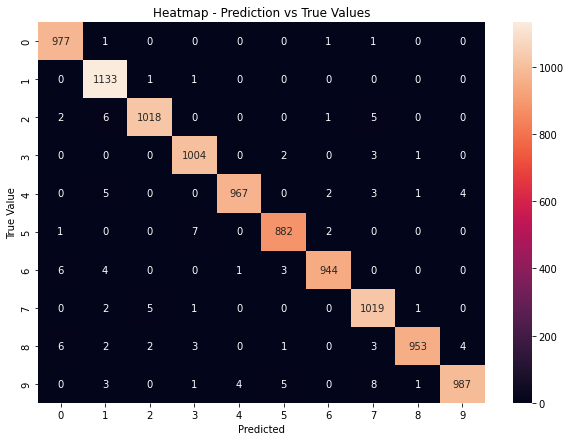

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Heatmap - Prediction vs True Values')
plt.show();

The variation between the predicted and true values should be very notable since the values are completely different from each other and that's exactly we can see in the above plot. So the result of heatmap is credible and meets our expectations.

## Model Testing

We are now in the final stage of the project. Here we will make predictions using our model and print the obtained result from the prediction as well. We will also compare the actual value and the prediction and print out whether the made prediction was correct or incorrect.

Predicted Value:  3
Correct Prediction!!


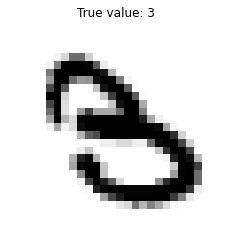

In [35]:
plt.imshow(X_test[18], cmap='gray_r')
plt.title('True value: {}'.format(y_test[18]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[18]))
if(y_test[18]==(np.argmax(pred[18]))):
    print('Correct Prediction!!')a
else:
    print('Incorrect Prediction!!')

Predicted Value:  0
Correct Prediction!!


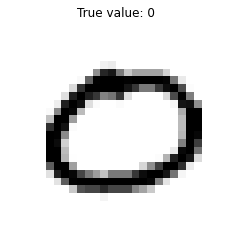

In [37]:
plt.imshow(X_test[69], cmap='gray_r')
plt.title('True value: {}'.format(y_test[69]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[69]))
if(y_test[69]==(np.argmax(pred[69]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

Predicted Value:  9
Correct Prediction!!


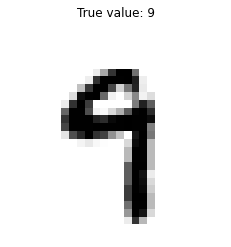

In [39]:
plt.imshow(X_test[108], cmap='gray_r')
plt.title('True value: {}'.format(y_test[108]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[108]))
if(y_test[108]==(np.argmax(pred[108]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

Since our model has 3 correct predictions out of 3 chances, we can successfully conclude that our model is reliable enough to be used for determining handwritten numbers correctly using Neural Networks.

## Saving the model

We will now save our model for future use as well.

In [40]:
model.save('LGMVIPTask7model.h5')